In [1]:
# 判断一个度序列可否构成一个简单图

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 定义数据结构
class Node:
    def __init__(self, name, degree):
        self.name = name
        self.degree = degree

In [2]:
def matrix2picture(adjacency_matrix):
    # 创建无向图
    G = nx.Graph()
    
    # 添加节点
    num_nodes = adjacency_matrix.shape[0]
    G.add_nodes_from(range(num_nodes))
    
    # 添加边
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            if adjacency_matrix[i][j] == 1:
                G.add_edge(i, j)
                
    # 绘制图形
    pos = nx.kamada_kawai_layout(G)  # 定义节点位置
    nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=1500, edge_color='black', linewidths=1, font_size=15)
    plt.show()

In [3]:
def list2node(degree_list):
    my_list = []
    for i in range(len(degree_list)):
        node = Node(i, degree_list[i])
        my_list.append(node)
    return my_list

In [4]:
def sort_node(node_list):
    sorted_node_list = sorted(node_list, key=lambda node: node.degree,reverse=True)
    return sorted_node_list

In [9]:
def havel_hakimi(degrees, adjacency_matrix):
    while any(degrees):
        degrees = sort_node(degrees)
        # 排完序之后需要之后的每一个节点减去第一个度数，从而将节点数减少一，降低问题规模
        for i in range(1, degrees[0].degree + 1):
            degrees[i].degree -= 1
            adjacency_matrix[degrees[0].name][degrees[i].name] = 1
            adjacency_matrix[degrees[i].name][degrees[0].name] = 1
        # 将第一个元素弹出
        degrees.pop(0)
        # 当删除完的序列中出现负整数的时候证明无法构成一个简单图
        for i in range(len(degrees)):
            if degrees[i].degree < 0:
                return False
    return True

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


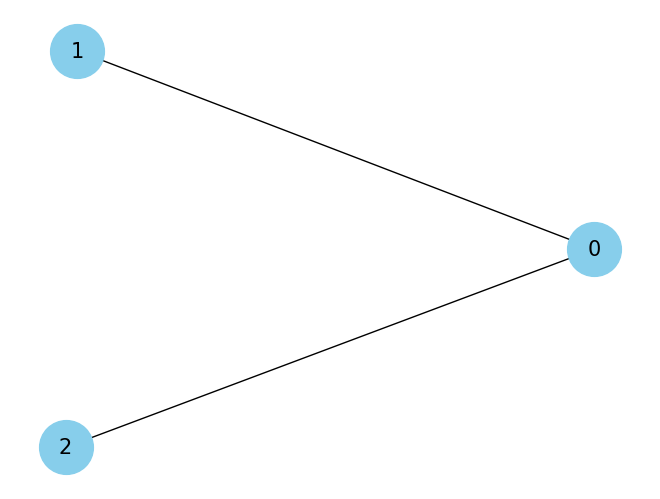

In [11]:
l = [2, 1, 1]
my_list = list2node(l)
adjacency_matrix = np.zeros((len(l), len(l)))
print(adjacency_matrix)
isgraph = havel_hakimi(my_list, adjacency_matrix)
print(adjacency_matrix)
if isgraph:
    matrix2picture(adjacency_matrix)
else:
    print("Not a graph")